_In this notebook, every question will be marked by a blue border, and answers should be provided in cells in a green border. All code-related answers are preceded by a #TODO._

## Students (to fill in)

 - Firmin Rousseau (A2)
 - Anya Meetoo (A2)

# Introduction

The objective of this lab is to dive into particular kind of neural network: the *Multi-Layer Perceptron* (MLP).

To start, let us take the dataset from the previous lab (hydrodynamics of sailing boats) and use scikit-learn to train a MLP instead of our hand-made single perceptron.
The code below is already complete and is meant to give you an idea of how to construct an MLP with scikit-learn. You can execute it, taking the time to understand the idea behind each cell.

In [1]:
# Importing the dataset
import numpy as np
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1]
Y = dataset[:, -1]

In [2]:
# Preprocessing: scale input data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [3]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.20)

In [4]:
# Define a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=3000, random_state=1) # define the model, with default params
mlp.fit(x_train, y_train) # train the MLP
print( mlp.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 3000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


Train score:  0.9940765369322633
Test score:   0.9899773031580283


Text(0, 0.5, 'Loss')

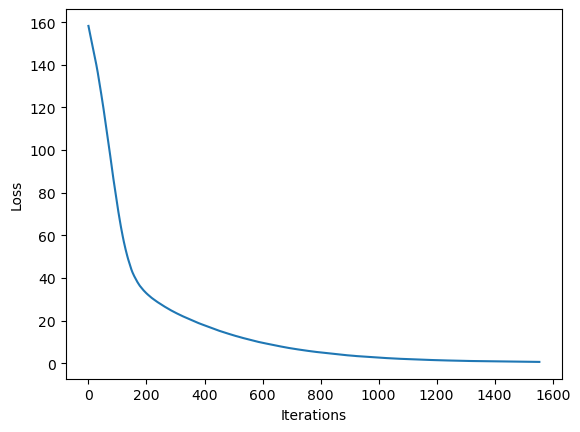

In [5]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")


<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_22252/2688785979.py:5: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')


Text(0, 0.5, 'f(examples)')

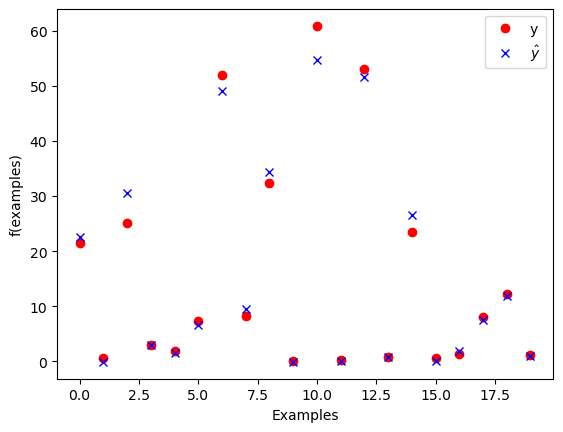

In [6]:
# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
yw = mlp.predict(x_test)
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

### Analyzing the network

Many details of the network are currently hidden as default parameters.

Using the [documentation of the MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), answer the following questions.
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- What is the structure of the network?
- What it is the algorithm used for training? Is there algorithm available that we mentioned during the courses?
- How does the training algorithm decides to stop the training?
</div>
<!-- Question End -->

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**
print( mlp.get_params())
- 'hidden_layer_sizes': (100,)
- 'solver': 'adam'
- 'max_iter': 3000
- 'activation': 'relu'
- 'n_iter_no_change': 10


Other algorithms :
- stochastic gradient descent (SGD)



</div>
<!-- Answer Section End -->

# Onto a more challenging dataset: house prices

For the rest of this lab, we will use the (more challenging) [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [7]:
# clean all previously defined variables for the sailing boats
%reset -f

In [8]:
"""Import the required modules"""
from sklearn.datasets import fetch_california_housing
from sklearn.utils import shuffle
import pandas as pd

cal_housing = fetch_california_housing()
print(f"dataset type : {type(cal_housing)}")
print(f"number of data : {len(cal_housing.data)}")
X_all = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y_all = pd.DataFrame(cal_housing.target,columns=["target"])

X_all, y_all = shuffle(X_all, y_all, random_state=1)

display(X_all.head(10)) # print the first 10 values
display(y_all.head(10))

y_all = y_all['target']  # transform from dataframe into a single vector as expected by most API in sklearn

dataset type : <class 'sklearn.utils._bunch.Bunch'>
number of data : 20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13
6636,7.3715,17.0,5.006098,0.993902,229.0,1.396341,34.15,-118.16
17333,5.2990,12.0,7.214932,1.047511,1200.0,2.714932,34.91,-120.44
19081,2.3276,29.0,4.731076,1.115538,1124.0,2.239044,38.31,-122.48
13298,3.4950,35.0,4.956522,0.952569,729.0,2.881423,34.08,-117.64
7157,3.1895,45.0,5.533333,1.166667,302.0,5.033333,34.04,-118.16


,target
4712,3.550
2151,0.707
15927,2.294
82,1.125
8161,2.254
6636,2.630
17333,2.268
19081,1.662
13298,1.180
7157,1.563


Note that each row of the dataset represents a **group of houses** (one district). The `target` variable denotes the average house value in units of 100.000 USD. Median Income is per 10.000 USD.

### Data Preparation

The dataset consists of 20,000 datas. We first extract the last 5,000 for test samples, which we will use later.

For training and validation, we will use a subset consisting of only 2,000 datas to speed up computations.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Split those 2000 remaining dataset between a training set and a validation set (see usage of `train_test_split` function earlier)
- Why did you choose this partition?
- What is the purpose of each subset (train, validation, test) ?

</div>
<!-- Question End -->


Please use the conventional names `X_train`, `X_val`, `y_train` and `y_val`.

In [9]:
# use the last N samples for test (for later use)

SAMPLES = 15000

num_test_samples = 5000
X_test, y_test = X_all[-num_test_samples:], y_all[-num_test_samples:]

# only use the first N samples to limit training time
num_samples = SAMPLES
X, y = X_all[:num_samples], y_all[:num_samples]

In [10]:

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,random_state=1, test_size = 0.20)

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**
random_state is a parameter used to control the randomness of a process to ensure reproducibility : 
By setting random_state to an arbitrary integer we ensure we get the same training and validation sets every time so our results are comparable.
The training set needs to be large enough to allow the model to learn meaningful patterns, and the validation set must be large enough to give a reliable estimate of how well the model generalizes.

- Training set :  the model updates its weights using this data
- Validation set : Used to evaluate the model during training like detecting overfitting
- Test set : Used only once, after training and validation are complete, to evaluate final performance on unseen data.



</div>
<!-- Answer Section End -->

### Scaling the input data


A step of **scaling** of the data is often useful to ensure that all input data centered on 0 and with a fixed variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The function `StandardScaler` from `sklearn.preprocessing` computes the standard score of a sample as:

```
z = (x - u) / s
```

where `u` is the mean of the training samples, and `s` is the standard deviation of the training samples.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Using the `StandardScaler`, first fit this scaler on your training dataset (`X_train`), then use this fitted scaler to transform the training dataset, the validation dataset (`X_val`), and the test dataset (`X_test`).


- Why is it important to fit the scaler only on the training data and not on the entire dataset or separately on each dataset?

</div>
<!-- Question End -->

[Documentation of standard scaler in scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_val=sc.transform(X_val)
X_test=sc.transform(X_test)

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**
Fitting the scaler on the whole dataset could create overfitting because the data used for evaluation (validation or test) would influence the preprocessing, giving the model access to information it shouldn't have during training.






</div>
<!-- Answer Section End -->

## Overfitting

In this part, we are only interested in maximizing the **train score**, i.e., having the network memorize the training examples as well as possible. While doing this, you should (1) remain within two minutes of training time, and (2) obtain a score that is greater than 0.90.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Propose a parameterization of the network (number of neurons per layer, number of layers, epochs, learning rates, stop conditions, ...) that will maximize the train score (without considering the test/validations scores). 
- Is the **validation** score substantially smaller than the **train** score (indicator of overfitting) ?
- Explain how the parameters you chose allow the learned model to overfit.
</div>
<!-- Question End -->

In [12]:
import json
import os

MEMORY_FILE = "memory2.txt"

def save_entry(entry: dict, file_path: str = MEMORY_FILE):
    """Save a dictionary entry as a JSON line in the memory file."""
    with open(file_path, "a") as f:
        f.write(json.dumps(entry) + "\n")

def load_entries(file_path: str = MEMORY_FILE):
    """Load all dictionary entries from the memory file."""
    if not os.path.exists(file_path):
        return []
    
    with open(file_path, "r") as f:
        return [json.loads(line) for line in f if line.strip()]

def clear_memory(file_path: str = MEMORY_FILE):
    """Clear the memory file."""
    open(file_path, "w").close()


Train score:  0.916428273921092
Test score:   0.7657923339825403


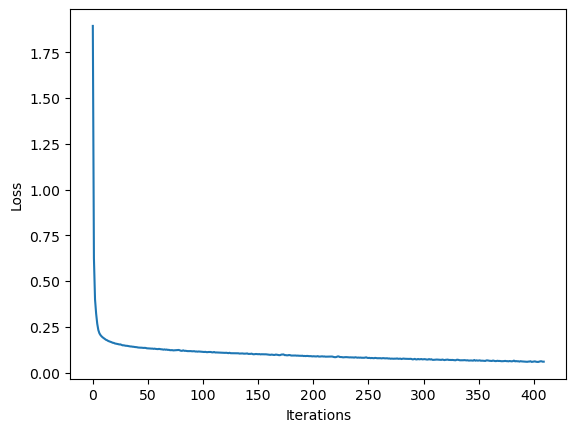

In [13]:
from sklearn.neural_network import MLPRegressor

ACTIVATION='relu'
MAX_ITER = 20000
EARLY_STOPPING=False
HIDDEN_LAYER_SIZE=(500, 200, 100, 50)
LEARNING_RATE_INIT=0.0001
mlp = MLPRegressor(
    hidden_layer_sizes=HIDDEN_LAYER_SIZE,   # 4 layers: large and deep
    activation=ACTIVATION,                   # Good for capturing complex patterns
    solver='adam',                       # Efficient for medium-sized datasets
    learning_rate_init=LEARNING_RATE_INIT,            # Default is good for Adam
    max_iter=MAX_ITER,                       # High iteration count to allow convergence
    early_stopping=EARLY_STOPPING,                # Disable early stopping to force full training
    alpha=0.00001,                       # Minimal regularization to encourage memorization
    random_state=1,
    verbose=False                         # Optional: print progress
)
import time
start = time.time()
mlp.fit(X_train, y_train) # train the MLP
end = time.time()
duration = round(end - start,2)
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")

save_entry({'activation': ACTIVATION,'hidden_layer_sizes': HIDDEN_LAYER_SIZE, 'max_iter': MAX_ITER, 'validation_score': mlp.score(X_val, y_val),'train_score': mlp.score(X_train, y_train),'early_stopping':EARLY_STOPPING, 'training_duration': duration})

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**
the **validation** score is not substantially smaller than the **train** score



A deep and wide network has high capacity, so it can learn very complex functions.

many training iterations to give the model enough time to adjust all weights finely

Disables early stopping based on validation performance even if it starts overfitting

A small learning rate makes training more stable and helps the network adjust its weights carefully to memorize the data.



</div>
<!-- Answer Section End -->

## Hyperparameter tuning

In this section, we are now interested in maximizing the ability of the network to predict the value of unseen examples, i.e., maximizing the **validation** score.
You should experiment with the possible parameters of the network in order to obtain a good validation score, ideally with a small learning time.

Parameters to vary:

- number and size of the hidden layers
- activation function
- stopping conditions
- maximum number of iterations
- initial learning rate value

Results to present for the tested configurations:

- Train/val score
- training time

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Present in a table the various parameters tested and the associated results. 
</div>
<!-- Question End -->

You can find a cell in the notebook a code snippet that will allow you to plot tables from python structure.
Be methodical in the way your run your experiments and collect data. For each run, you should record the parameters and results into an external data structure.

(Note that, while we encourage you to explore the solution space manually, there are existing methods in scikit-learn and other learning framework to automate this step as well, e.g., [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

ACTIVATION='relu'
MAX_ITER = 20000
EARLY_STOPPING=True
HIDDEN_LAYER_SIZE=(500, 200, 100, 50)
LEARNING_RATE_INIT=0.00001


parameters = {
    'hidden_layer_sizes': [(500, 200, 100, 50), (1000, 500, 200, 100)],
    'max_iter': [10000],
    'early_stopping': [True]
}

mlps = GridSearchCV(estimator=MLPRegressor(), param_grid=parameters, cv=2)


import time
start = time.time()
mlps_fit=mlps.fit(X_train, y_train) # train the MLP
end = time.time()
duration = round(end - start,2)
best=mlps_fit.best_estimator_
validation_score=best.score(X_val, y_val)
print(validation_score)
print(mlps_fit.best_score_)
print(best.score(X_train, y_train))
print(mlps_fit.best_params_)

results = mlps.cv_results_
scores_df = pd.DataFrame(results)

print(results)

print(scores_df[['param_hidden_layer_sizes', 'param_max_iter', 'param_early_stopping', 'mean_test_score']])


#save_entry({'activation': ACTIVATION,'hidden_layer_sizes': HIDDEN_LAYER_SIZE, 'max_iter': MAX_ITER, 'validation_score': mlp.score(X_val, y_val),'train_score': mlp.score(X_train, y_train),'early_stopping':EARLY_STOPPING, 'training_duration': duration})

/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
print(best)
print("Best score validation: ", best.score(X_val, y_val))
print("Best score train: ", best.score(X_train, y_train))

MLPRegressor(early_stopping=True, hidden_layer_sizes=(500, 200, 100, 50),
             max_iter=10000)
Best score validation:  0.7576090874309275
Best score train:  0.8224563796207557


In [18]:
from sklearn.model_selection import ParameterGrid

ACTIVATION='relu'
MAX_ITER = 20000
EARLY_STOPPING=True
LEARNING_RATE_INIT=0.00001


parameters = {
    'solver': ['adam'],
    'hidden_layer_sizes': [(1000, 500, 200, 100), (2000, 1000, 500, 200)],
    'activation': ['relu', 'tanh'],
    'max_iter': [10000, 20000],
    'early_stopping': [True]
}

grid = ParameterGrid(parameters)

for params in grid:
    #print(params)
    mlp_test = MLPRegressor(**params)
    #print(mlp_test)
    import time
    start = time.time()
    mlp_test.fit(X_train, y_train) # train the MLP
    end = time.time()
    duration = round(end - start,2)
    save_entry({'activation': params['activation'],'hidden_layer_sizes': params['hidden_layer_sizes'], 'max_iter': params['max_iter'], 'validation_score': mlp_test.score(X_val, y_val),'train_score': mlp_test.score(X_train, y_train),'early_stopping':EARLY_STOPPING, 'training_duration': duration, 'solver': params['solver'],'num_samples': SAMPLES})

In [23]:
# Code snippet to display a nice table in jupyter notebooks  (remove from report)
import pandas as pd
import numpy as np
MEMORY_FILE = "memory2.txt"
data = load_entries(MEMORY_FILE)


table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='validation_score', ascending=False)
table

,activation,hidden_layer_sizes,max_iter,validation_score,train_score,early_stopping,training_duration,solver,num_samples
49,relu,"[2000, 1000, 500, 200]",20000,0.807983,0.850345,True,130.24,adam,15000.0
48,relu,"[2000, 1000, 500, 200]",10000,0.805286,0.843743,True,124.61,adam,15000.0
47,relu,"[1000, 500, 200, 100]",20000,0.804168,0.851379,True,40.85,adam,15000.0
42,relu,"[500, 200, 100, 50]",10000,0.802171,0.829476,True,9.62,adam,15000.0
50,tanh,"[1000, 500, 200, 100]",10000,0.801951,0.843536,True,23.30,adam,15000.0
45,tanh,"[500, 200, 100, 50]",20000,0.800526,0.822421,True,8.10,adam,15000.0
52,tanh,"[2000, 1000, 500, 200]",10000,0.800127,0.847597,True,108.05,adam,15000.0
46,relu,"[1000, 500, 200, 100]",10000,0.799714,0.841407,True,34.36,adam,15000.0
44,tanh,"[500, 200, 100, 50]",10000,0.798254,0.823510,True,7.52,adam,15000.0
53,tanh,"[2000, 1000, 500, 200]",20000,0.798202,0.853475,True,107.13,adam,15000.0


## Evaluation
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?
- Evaluate the score of your model on the test set that was not used for training nor for model selection.
- Train a model using your optimal parameters on the initial 15,000 data points. Evaluate the performance using the test set. What are your thoughts on the amount of data used? Do you believe the time spent is worthwhile in terms of the improvement in performance?
</div>
<!-- Question End -->

In [24]:
# TODO

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

From the table above, we can see that the best model is 
- solver : adam
- activation function : relu  
- hidden layers : 4 layers [2000, 1000, 500, 200]
- max iterations : 20000
- train score : 0.850345
- validation score : 0.807983	
- duration : 130.24	
- number of samples : 15000

Obsevations:

- tanh is faster and better for large set of hidden layers but with smaller number of samples
- but relu is superior when all parameters are max but the time to train is very big 

Thoughts on 15000 samples
- is very heavy to train with
- the performance rate did not increase significantly compared to 2000 sample, so do we value more the time than the result?
- Personally the time is more important than the result, but it depends on the application.

</div>
<!-- Answer Section End -->